# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


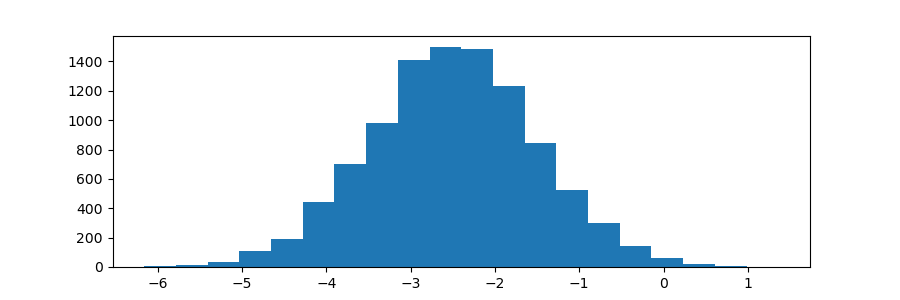

AttributeError: 'Rectangle' object has no property 'normed'

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


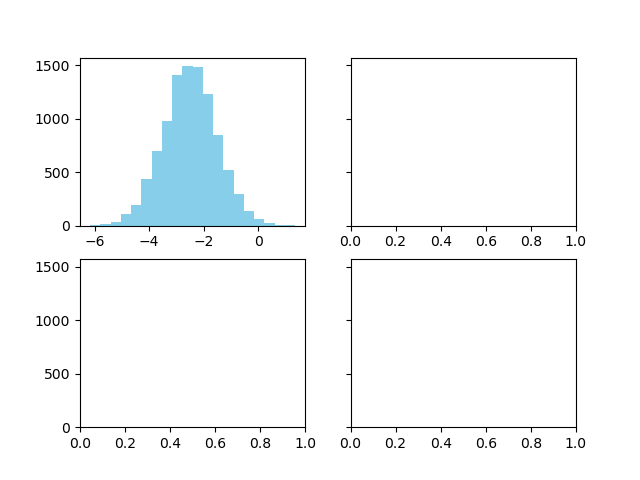

AttributeError: 'Rectangle' object has no property 'normed'

In [7]:

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,sharey=True)
ax1.hist(x1, normed=True, bins=20, alpha=0.5, color='skyblue')
ax1.set_title('Normal Distribution')
ax2.hist(x2, normed=True, bins=20, alpha=0.5, color='orange')
ax2.set_title('Gamma Distribution')
ax3.hist(x3, normed=True, bins=20, alpha=0.5, color='green')
ax3.set_title('Exponential Distribution')
ax4.hist(x4, normed=True, bins=20, alpha=0.5, color='red')
ax4.set_title('Uniform Distribution')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


In [5]:
#Creates an animation, pulling between 100 and 1000 samples from each of the random variables (x1, x2, x3, x4) 
#for each plot and plotting this as we did in the lecture on animation.
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

<IPython.core.display.Javascript object>


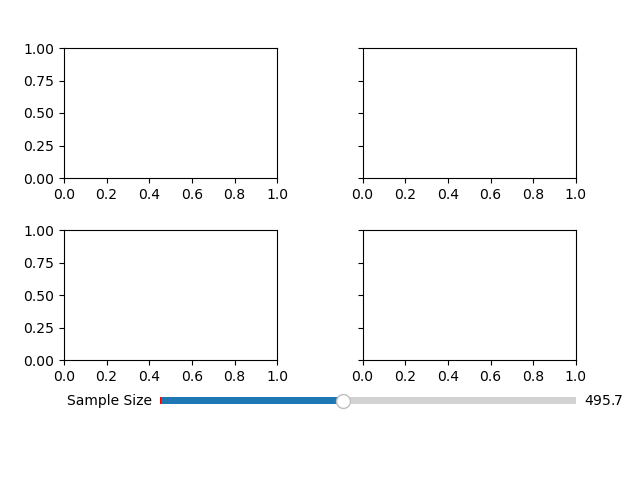

In [8]:
# create the function that will do the plotting, where curr is the current frame
max_sample_size = 100

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey=True)
axes = [ax1, ax2, ax3, ax4]

plt.subplots_adjust(left=0.1,
                    bottom=0.25,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins1 = np.arange(-8, 2, 0.4)
bins2 = np.arange(-1,16,0.4)
bins3 = np.arange(5,30,0.4)
bins4 = np.arange(10,25,0.4)

# Create axes for frequency and amplitude sliders
axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
 
# Create a slider from 100.0 to 1000.0 in axes axfreq with 100 as initial value
sample_size = Slider(axfreq, 'Sample Size', valmin = 100.0, valmax=1000.0, valinit=100)
a=None
# Call update function when slider value is changed
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    global max_sample_size
    if curr >= max_sample_size: 
        a.event_source.stop()
    
    for ax in axes:
        ax.clear()

    ax1_plot = ax1.hist(x1[:curr], bins=bins1,normed=True,alpha=0.5,color='red')
    ax2_plot = ax2.hist(x2[:curr], bins=bins2,normed=True,alpha=0.5,color='skyblue')
    ax3_plot = ax3.hist(x3[:curr], bins=bins3,normed=True,alpha=0.5,color='pink')
    ax4_plot = ax4.hist(x4[:curr], bins=bins4,normed=True,alpha=0.5,color='green')

    ax1.axis([-8,2,0,0.6])
    ax2.axis([-1,16,0,0.6])
    ax3.axis([5,30,0,0.6])
    ax4.axis([10,25,0,0.6])
    
    ax1.set_title('Normal Distribution')
    ax2.set_title('Gamma Distribution')
    ax3.set_title('Exponential Distribution')
    ax4.set_title('Uniform Distribution')
    
    ax1.annotate('n = {}'.format(curr),(-0.9, 0.51))
    ax2.annotate('n = {}'.format(curr),(11.50, 0.52))
    ax3.annotate('n = {}'.format(curr),(23.15, 0.51))
    ax4.annotate('n = {}'.format(curr),(21.22, 0.51))

    max_sample_size = sample_size.val

def animate():
    global a
    a = animation.FuncAnimation(fig, update,interval=10)
    
    
    
sample_size.on_changed(update)
animate()